<a href="https://colab.research.google.com/github/arc03/ABInBev/blob/main/ABInBev_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Packages**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Data Reading**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
data_Actuals=pd.read_excel('/content/drive/MyDrive/Actuals.xlsx')

In [59]:
data_Target=pd.read_excel('/content/drive/MyDrive/Target.xlsx')

In [60]:
data_Price=pd.read_excel('/content/drive/MyDrive/Price.xlsx')

In [61]:
data_BCR=pd.read_excel('/content/drive/MyDrive/B&CR.xlsx')

In [62]:
data_Actuals.head()

,Material Description,Plant,Period,Year,Amount in LC,Quantity
0,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152
1,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,8301.318182,275.757576
2,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,5806.336364,193.333333
3,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,8567.327273,284.545455
4,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,11897.027273,394.545455


In [63]:
data_Target.head()

,Year,Period,Plant,Material Number,Target Value in LC,Target Quantity
0,2022,7,AA,NaN,0.000000e+00,0.000000
1,2022,7,AA,A5 lock out tags in Tyvek with a drill H,0.000000e+00,0.000000
2,2022,7,AA,Bottle: 660RB Green Lite,2.120873e+03,135.790000
3,2022,7,AA,Bottle: 660RB Green Lite,1.571137e+06,99474.848485
4,2022,7,AA,Bottle: 750RB Amber Calabash,5.123673e+03,362.208788


In [64]:
data_Price.head()

,Plant,Material Description,Price per case
0,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.035875
1,AD,B&CR: 750RB Amber Calabash & Brown Crate,16.035875
2,AG,B&CR: 750RB Amber Calabash & Brown Crate,16.035875
3,AF,B&CR: 750RB Amber Calabash & Brown Crate,16.035875
4,AC,B&CR: 750RB Amber Calabash & Brown Crate,16.035875


In [65]:
data_BCR.head()

,Material Number,Bottle,Crate
0,B&CR: 1000RB Amber & 1L Brown Crate,Bottle: 1000RB Amber,Crate: 1L Brown
1,B&CR: 1000RB Amber & 1L Brown Crate,Crate: 1L Brown,Crate: 1L Brown
2,B&CR: 330RB Amber & Brown Crate,Bottle: 330RB Amber Uno,Crate: Brown Pint
3,B&CR: 330RB Amber & Brown Crate,Crate: Brown Pint,Crate: Brown Pint
4,B&CR: 330RB Flint & Blue Crate,Bottle: 330RB Flint Uno,Crate: Blue Pint


**Data Cleaning**

In [66]:
data_Actuals.dropna()

,Material Description,Plant,Period,Year,Amount in LC,Quantity
0,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152
1,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,8301.318182,275.757576
2,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,5806.336364,193.333333
3,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,8567.327273,284.545455
4,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,11897.027273,394.545455
...,...,...,...,...,...,...
65060,Keg: 50L Empty,AG,9,2022,-446986.390909,-942.121212
65061,Keg: 30L Empty,AG,9,2022,48373.286364,103.636364
65062,Keg: 50L Empty,AG,9,2022,-380239.868182,-801.212121
65063,Keg: 30L Empty,AG,9,2022,-722154.313636,-1523.030303


In [67]:
data_Target.dropna(thresh = 5)

,Year,Period,Plant,Material Number,Target Value in LC,Target Quantity
0,2022,7,AA,NaN,0.000000e+00,0.000000
1,2022,7,AA,A5 lock out tags in Tyvek with a drill H,0.000000e+00,0.000000
2,2022,7,AA,Bottle: 660RB Green Lite,2.120873e+03,135.790000
3,2022,7,AA,Bottle: 660RB Green Lite,1.571137e+06,99474.848485
4,2022,7,AA,Bottle: 750RB Amber Calabash,5.123673e+03,362.208788
...,...,...,...,...,...,...
921,2022,7,AG,"ADHESIVE:SUPER GLUE,3G TUBE",0.000000e+00,0.000000
922,2022,7,AG,"BATTERY,DRY CELL:ALKALINE,1.5VDC,AAA,FLA",0.000000e+00,0.000000
923,2022,7,AG,BRUSH PAINT PROFESSIONAL 50mm,0.000000e+00,0.000000
924,2022,7,AG,"TAPE:MASKING,48MM WD,40M LG,PAPER,YELLOW",0.000000e+00,0.000000


In [68]:
data_comb=data_Actuals.merge(data_Target,on=[ "Plant"])

In [69]:
data_comb

,Material Description,Plant,Period_x,Year_x,Amount in LC,Quantity,Year_y,Period_y,Material Number,Target Value in LC,Target Quantity
0,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,NaN,0.000000e+00,0.000000
1,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,A5 lock out tags in Tyvek with a drill H,0.000000e+00,0.000000
2,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,Bottle: 660RB Green Lite,2.120873e+03,135.790000
3,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,Bottle: 660RB Green Lite,1.571137e+06,99474.848485
4,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,Bottle: 750RB Amber Calabash,5.123673e+03,362.208788
...,...,...,...,...,...,...,...,...,...,...,...
3312843,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000
3312844,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000
3312845,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000
3312846,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000


In [70]:
data_comb.dropna()

,Material Description,Plant,Period_x,Year_x,Amount in LC,Quantity,Year_y,Period_y,Material Number,Target Value in LC,Target Quantity
1,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.4,221.515152,2022,7,A5 lock out tags in Tyvek with a drill H,0.000000e+00,0.000000
2,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.4,221.515152,2022,7,Bottle: 660RB Green Lite,2.120873e+03,135.790000
3,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.4,221.515152,2022,7,Bottle: 660RB Green Lite,1.571137e+06,99474.848485
4,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.4,221.515152,2022,7,Bottle: 750RB Amber Calabash,5.123673e+03,362.208788
5,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.4,221.515152,2022,7,Bottle: 750RB Amber Calabash,3.795604e+06,267213.939394
...,...,...,...,...,...,...,...,...,...,...,...
3312143,Keg: 50L Empty,AG,9,2022,-145263.4,-305.151515,2022,7,"ADHESIVE:SUPER GLUE,3G TUBE",0.000000e+00,0.000000
3312144,Keg: 50L Empty,AG,9,2022,-145263.4,-305.151515,2022,7,"BATTERY,DRY CELL:ALKALINE,1.5VDC,AAA,FLA",0.000000e+00,0.000000
3312145,Keg: 50L Empty,AG,9,2022,-145263.4,-305.151515,2022,7,BRUSH PAINT PROFESSIONAL 50mm,0.000000e+00,0.000000
3312146,Keg: 50L Empty,AG,9,2022,-145263.4,-305.151515,2022,7,"TAPE:MASKING,48MM WD,40M LG,PAPER,YELLOW",0.000000e+00,0.000000


Data Combination

In [71]:
data_comb=data_comb[data_comb['Quantity']>=0]

In [72]:
data_comb

,Material Description,Plant,Period_x,Year_x,Amount in LC,Quantity,Year_y,Period_y,Material Number,Target Value in LC,Target Quantity
0,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,NaN,0.000000e+00,0.000000
1,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,A5 lock out tags in Tyvek with a drill H,0.000000e+00,0.000000
2,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,Bottle: 660RB Green Lite,2.120873e+03,135.790000
3,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,Bottle: 660RB Green Lite,1.571137e+06,99474.848485
4,B&CR: 660RB Green Lite & Red Crate,AA,7,2022,6659.400000,221.515152,2022,7,Bottle: 750RB Amber Calabash,5.123673e+03,362.208788
...,...,...,...,...,...,...,...,...,...,...,...
3312843,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000
3312844,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000
3312845,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000
3312846,NaN,NaN,8,2022,-178233.163636,1.515152,2022,7,NaN,0.000000e+00,0.000000


In [73]:
data_comb=data_comb[data_comb['Material Description']==data_comb['Material Number']]

In [74]:
data_comb

,Material Description,Plant,Period_x,Year_x,Amount in LC,Quantity,Year_y,Period_y,Material Number,Target Value in LC,Target Quantity
3616,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,Crate: Red Quart,1.439881e+06,99474.848485
3617,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,Crate: Red Quart,9.464318e+02,66.899091
3647,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,Crate: Red Quart,0.000000e+00,0.000000
3648,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,Crate: Red Quart,0.000000e+00,0.000000
31822,Crate: Brown Quart,AA,7,2022,30.704545,3.636364,2022,7,Crate: Brown Quart,3.867912e+06,267213.939394
...,...,...,...,...,...,...,...,...,...,...,...
3292010,Keg: 50L Empty,AG,9,2022,145263.400000,308.181818,2022,7,Keg: 50L Empty,0.000000e+00,0.000000
3311743,Keg: 50L Empty,AG,9,2022,262966.945455,556.666667,2022,7,Keg: 50L Empty,0.000000e+00,0.000000
3311744,Keg: 50L Empty,AG,9,2022,262966.945455,556.666667,2022,7,Keg: 50L Empty,0.000000e+00,0.000000
3311897,Keg: 30L Empty,AG,9,2022,48373.286364,103.636364,2022,7,Keg: 30L Empty,0.000000e+00,0.000000


In [75]:
data1=data_comb['Plant']

In [76]:
from pandas.core import describe
describe

<module 'pandas.core.describe' from '/usr/local/lib/python3.10/dist-packages/pandas/core/describe.py'>

In [77]:
data_comb.describe()

,Period_x,Year_x,Amount in LC,Quantity,Year_y,Period_y,Target Value in LC,Target Quantity
count,1188.000000,1188.0,1188.000000,1188.000000,1188.0,1188.0,1.188000e+03,1188.000000
mean,8.207912,2022.0,55538.047391,7794.598510,2022.0,7.0,2.103118e+05,14590.933757
std,0.657819,0.0,100577.302236,24717.538557,0.0,0.0,5.075427e+05,35241.693362
min,7.000000,2022.0,-717.704545,0.000000,2022.0,7.0,0.000000e+00,0.000000
25%,8.000000,2022.0,5134.314773,92.878788,2022.0,7.0,0.000000e+00,0.000000
50%,8.000000,2022.0,20526.350000,383.333333,2022.0,7.0,0.000000e+00,0.000000
75%,9.000000,2022.0,57882.871591,3299.696970,2022.0,7.0,2.553641e+03,177.932424
max,9.000000,2022.0,892250.290909,217499.696970,2022.0,7.0,3.867912e+06,267213.939394


In [78]:
data_comb.drop(data_comb[['Material Number']],axis=1)


,Material Description,Plant,Period_x,Year_x,Amount in LC,Quantity,Year_y,Period_y,Target Value in LC,Target Quantity
3616,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,1.439881e+06,99474.848485
3617,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,9.464318e+02,66.899091
3647,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,0.000000e+00,0.000000
3648,Crate: Red Quart,AA,7,2022,188.613636,14.545455,2022,7,0.000000e+00,0.000000
31822,Crate: Brown Quart,AA,7,2022,30.704545,3.636364,2022,7,3.867912e+06,267213.939394
...,...,...,...,...,...,...,...,...,...,...
3292010,Keg: 50L Empty,AG,9,2022,145263.400000,308.181818,2022,7,0.000000e+00,0.000000
3311743,Keg: 50L Empty,AG,9,2022,262966.945455,556.666667,2022,7,0.000000e+00,0.000000
3311744,Keg: 50L Empty,AG,9,2022,262966.945455,556.666667,2022,7,0.000000e+00,0.000000
3311897,Keg: 30L Empty,AG,9,2022,48373.286364,103.636364,2022,7,0.000000e+00,0.000000


x representing actual , y representing Target

<Axes: >

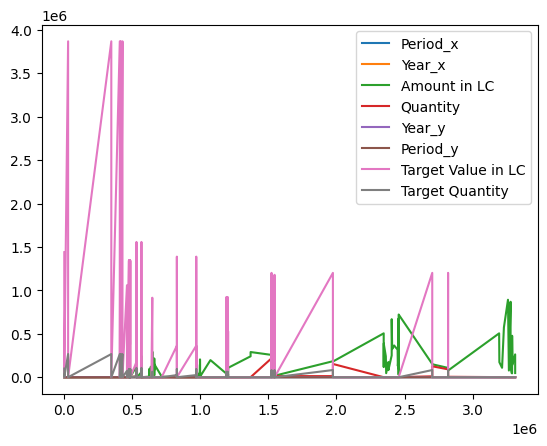

In [79]:
data_comb.plot.line()

<Axes: xlabel='Period_y'>

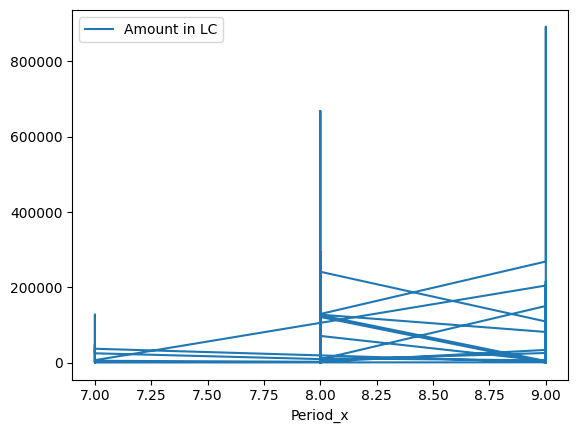

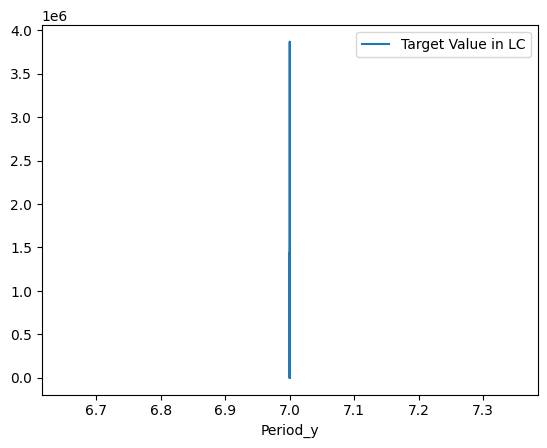

In [92]:
from matplotlib import figure
from matplotlib.figure import Figure
data_comb.plot.line(x='Period_x',y=['Amount in LC'])
data_comb.plot.line(x='Period_y',y=['Target Value in LC'],figure)

In [93]:
data=data_comb[['Material Description','Plant']]

In [94]:
data

,Material Description,Plant
3616,Crate: Red Quart,AA
3617,Crate: Red Quart,AA
3647,Crate: Red Quart,AA
3648,Crate: Red Quart,AA
31822,Crate: Brown Quart,AA
...,...,...
3292010,Keg: 50L Empty,AG
3311743,Keg: 50L Empty,AG
3311744,Keg: 50L Empty,AG
3311897,Keg: 30L Empty,AG


In [95]:
data["Category"] = data["Material Description"].apply(lambda x: x.split()[0])


<ipython-input-95-d802634e1c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Category"] = data["Material Description"].apply(lambda x: x.split()[0])


In [96]:
data.head()

,Material Description,Plant,Category
3616,Crate: Red Quart,AA,Crate:
3617,Crate: Red Quart,AA,Crate:
3647,Crate: Red Quart,AA,Crate:
3648,Crate: Red Quart,AA,Crate:
31822,Crate: Brown Quart,AA,Crate:


**Categorizing the data:-**

In [97]:
data

,Material Description,Plant,Category
3616,Crate: Red Quart,AA,Crate:
3617,Crate: Red Quart,AA,Crate:
3647,Crate: Red Quart,AA,Crate:
3648,Crate: Red Quart,AA,Crate:
31822,Crate: Brown Quart,AA,Crate:
...,...,...,...
3292010,Keg: 50L Empty,AG,Keg:
3311743,Keg: 50L Empty,AG,Keg:
3311744,Keg: 50L Empty,AG,Keg:
3311897,Keg: 30L Empty,AG,Keg:


<Axes: >

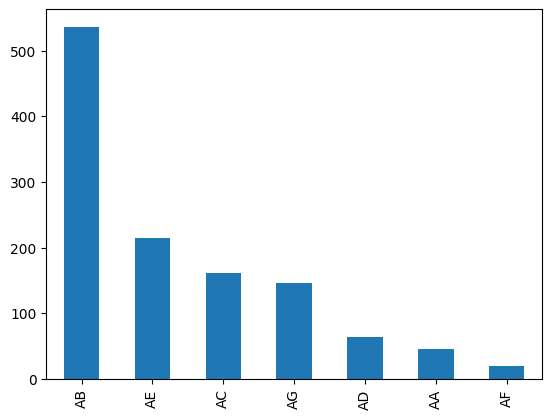

In [98]:
data['Plant'].value_counts().plot(kind='bar')

In [99]:
data.drop(data[['Material Description']],axis=1)


,Plant,Category
3616,AA,Crate:
3617,AA,Crate:
3647,AA,Crate:
3648,AA,Crate:
31822,AA,Crate:
...,...,...
3292010,AG,Keg:
3311743,AG,Keg:
3311744,AG,Keg:
3311897,AG,Keg:


<Axes: >

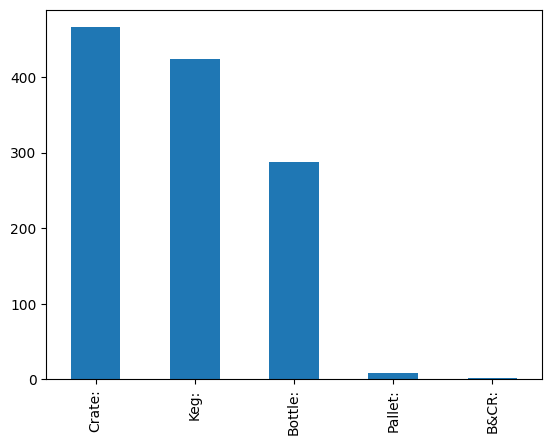

In [100]:
data['Category'].value_counts().plot(kind='bar')

In [101]:
data_crate=data['Category']=='Crate:'

(<Figure size 640x480 with 3 Axes>,
 {('Crate:', 'AA'): (0.0, 0.0, 0.38456460025087474, 0.09677690818816796),
  ('Crate:', 'AB'): (0.0,
   0.10004488204437711,
   0.38456460025087474,
   0.6101152907514937),
  ('Crate:', 'AC'): (0.0,
   0.7134281466520801,
   0.38456460025087474,
   0.03786922494319617),
  ('Crate:', 'AD'): (0.0,
   0.7545653454514853,
   0.38456460025087474,
   0.004207691660355105),
  ('Crate:', 'AE'): (0.0,
   0.7620410109680495,
   0.38456460025087474,
   0.15147689977278467),
  ('Crate:', 'AF'): (0.0,
   0.9167858845970435,
   0.38456460025087474,
   0.021038458301775635),
  ('Crate:', 'AG'): (0.0,
   0.9410923167550282,
   0.38456460025087474,
   0.0589076832449718),
  ('Bottle:', 'AA'): (0.38946656103518845, 0.0, 0.23767082590612007, 0.0),
  ('Bottle:', 'AB'): (0.38946656103518845,
   0.0032679738562091504,
   0.23767082590612007,
   0.8374183006535947),
  ('Bottle:', 'AC'): (0.38946656103518845,
   0.8439542483660131,
   0.23767082590612007,
   0.0),
  ('Bottle

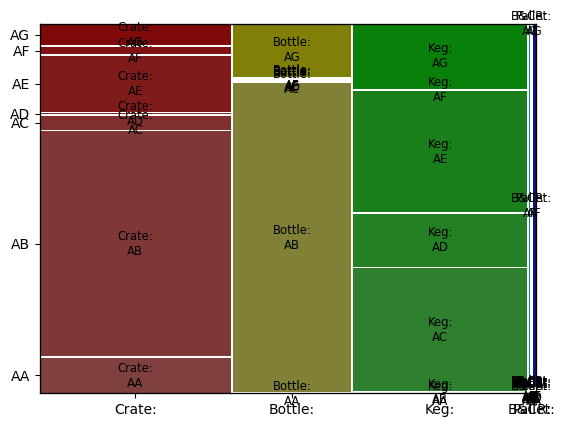

In [102]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 10.0
mosaic(data, ['Category', 'Plant'])